# Tugas 2
# Nama: Oktaveian Aliansyah
# NIM: 220411100099

# library yang dibutuhkan

In [41]:
import re
import string
import pymupdf4llm
import fitz
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# menggabungkan file pdf

In [26]:
def gabungkan_pdf(file_list, output_pdf):
    doc = fitz.open()
    for pdf in file_list:
        with fitz.open(pdf) as temp_doc:
            doc.insert_pdf(temp_doc)  # Menambahkan halaman dari file lain
    doc.save(output_pdf)  # Menyimpan hasil gabungan
    doc.close()

# Contoh penggunaan
daftar_pdf = ["../Doc/Doc1-22_099.pdf", "../Doc/Doc2-22_099.pdf"]
gabungkan_pdf(daftar_pdf, "../Doc/Doc3-22_099.pdf")


## menampilan file pdf yang sudah digabungkan

In [ ]:

md_text = pymupdf4llm.to_markdown("../Doc/Doc3-22_099.pdf")
print(md_text)

Processing ../Doc/Doc3-22_099.pdf...
[                                        ] (0/2===================[====================                    ] (1/2===================[========================================] (2/2]
Mata kuliah Data Mining selalu menjadi favoritku setiap Senin pagi. Sejak pertama kali
mengikuti kelas ini, aku langsung tertarik dengan cara data dapat diolah untuk
menemukan pola tersembunyi. Dosen yang mengajar sangat interaktif dan selalu
membawakan contoh nyata yang membuat materi lebih mudah dipahami.

Salah satu hal yang paling aku sukai dari kuliah ini adalah saat kami membahas
bagaimana algoritma Page Rank bekerja dalam menentukan urutan hasil pencarian di
Google. Dosen menjelaskan dengan sederhana, kemudian kami langsung mencoba
mengimplementasikannya menggunakan Python dan OpenMPI untuk pemrosesan
paralel. Aku semakin kagum melihat bagaimana data yang awalnya tampak acak bisa
diolah menjadi informasi yang berguna.

Selain itu, diskusi di kelas selalu seru. Kami

# tokenisasi kalimat

In [28]:
token_kalimat = nltk.tokenize.sent_tokenize(md_text)
print(token_kalimat)

['Mata kuliah Data Mining selalu menjadi favoritku setiap Senin pagi.', 'Sejak pertama kali\nmengikuti kelas ini, aku langsung tertarik dengan cara data dapat diolah untuk\nmenemukan pola tersembunyi.', 'Dosen yang mengajar sangat interaktif dan selalu\nmembawakan contoh nyata yang membuat materi lebih mudah dipahami.', 'Salah satu hal yang paling aku sukai dari kuliah ini adalah saat kami membahas\nbagaimana algoritma Page Rank bekerja dalam menentukan urutan hasil pencarian di\nGoogle.', 'Dosen menjelaskan dengan sederhana, kemudian kami langsung mencoba\nmengimplementasikannya menggunakan Python dan OpenMPI untuk pemrosesan\nparalel.', 'Aku semakin kagum melihat bagaimana data yang awalnya tampak acak bisa\ndiolah menjadi informasi yang berguna.', 'Selain itu, diskusi di kelas selalu seru.', 'Kami sering diberikan studi kasus, misalnya\nbagaimana Netflix merekomendasikan film atau bagaimana e-commerce memprediksi\nbarang yang akan dibeli pelanggan.', 'Saat sesi praktikum, aku merasa

# menghapus angka, tanda baca dan stopword

In [38]:
def text_prep(file):
    file = re.sub(r"\d", "", file)
    file = file.translate(str.maketrans('','',string.punctuation)).lower()
    tokens = word_tokenize(file)
    listStopword =  set(stopwords.words('indonesian'))
    file = ' '.join(kata for kata in tokens if kata not in listStopword)
    return file

file = md_text
tp = text_prep(file)
print(tp)

mata kuliah data mining favoritku senin pagi kali mengikuti kelas langsung tertarik data diolah menemukan pola tersembunyi dosen mengajar interaktif membawakan contoh nyata materi mudah dipahami salah sukai kuliah membahas algoritma page rank menentukan urutan hasil pencarian google dosen sederhana langsung mencoba mengimplementasikannya python openmpi pemrosesan paralel kagum data acak diolah informasi berguna diskusi kelas seru studi netflix merekomendasikan film ecommerce memprediksi barang dibeli pelanggan sesi praktikum detektif mencari pola lautan data mat islam indonesia menyambut suci ramadhan hijriah pekan penuh berkah momen umat islam menjalankan ibadah puasa diperintahkan alquran surah albaqarah ayat ramadhan syakban indonesia penetapan ramadan sidang isbat digelar kementerian agama kemenag sidang isbat mengacu fatwa majelis ulama indonesia mui nomor penetapan ramadhan syawal dzulhijjah pemerintah organisasi islam nahdlatul ulama nu muhammadiyah menetapkan ramadan berdasarka

# mencari frekuensi kemunculan setiap kata dan memvisualisasikan frekuensi

## mencari frekuensi kata

In [46]:
# lakukan tokenize dulu
tokenize = nltk.tokenize.word_tokenize(tp)
# lalu cari frekuensi
frekuensi = nltk.FreqDist(tokenize)
print(frekuensi.most_common())

[('data', 4), ('indonesia', 4), ('islam', 3), ('ramadhan', 3), ('metode', 3), ('kuliah', 2), ('kelas', 2), ('langsung', 2), ('diolah', 2), ('pola', 2), ('dosen', 2), ('penetapan', 2), ('ramadan', 2), ('sidang', 2), ('isbat', 2), ('agama', 2), ('ulama', 2), ('pemerintah', 2), ('nu', 2), ('muhammadiyah', 2), ('hilal', 2), ('mata', 1), ('mining', 1), ('favoritku', 1), ('senin', 1), ('pagi', 1), ('kali', 1), ('mengikuti', 1), ('tertarik', 1), ('menemukan', 1), ('tersembunyi', 1), ('mengajar', 1), ('interaktif', 1), ('membawakan', 1), ('contoh', 1), ('nyata', 1), ('materi', 1), ('mudah', 1), ('dipahami', 1), ('salah', 1), ('sukai', 1), ('membahas', 1), ('algoritma', 1), ('page', 1), ('rank', 1), ('menentukan', 1), ('urutan', 1), ('hasil', 1), ('pencarian', 1), ('google', 1), ('sederhana', 1), ('mencoba', 1), ('mengimplementasikannya', 1), ('python', 1), ('openmpi', 1), ('pemrosesan', 1), ('paralel', 1), ('kagum', 1), ('acak', 1), ('informasi', 1), ('berguna', 1), ('diskusi', 1), ('seru', 1)

## memvisualisasikan frekuensi

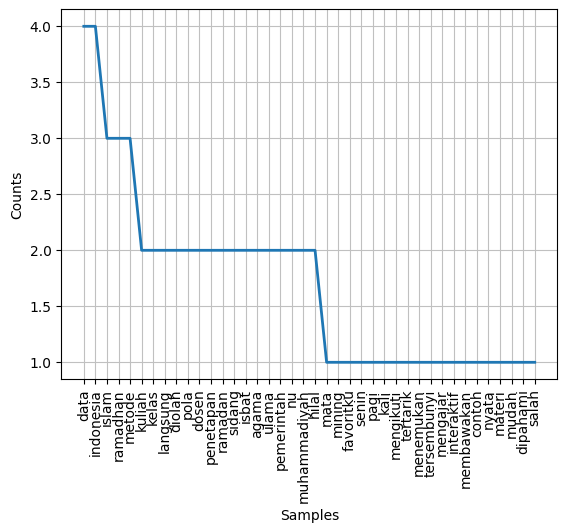

In [51]:
frekuensi.plot(40,cumulative=False)
plt.show()

# stemming kata menggunakan sastrawi

In [53]:
stem = StemmerFactory()
stemer = stem.create_stemmer()

stemming = stemer.stem(tp)
print(stemming)

mata kuliah data mining favorit senin pagi kali ikut kelas langsung tarik data olah temu pola sembunyi dosen ajar interaktif bawa contoh nyata materi mudah paham salah suka kuliah bahas algoritma page rank tentu urut hasil cari google dosen sederhana langsung coba implementasi python openmpi pemrosesan paralel kagum data acak olah informasi guna diskusi kelas seru studi netflix rekomendasi film ecommerce prediksi barang beli langgan sesi praktikum detektif cari pola laut data mat islam indonesia sambut suci ramadhan hijriah pekan penuh berkah momen umat islam jalan ibadah puasa perintah alquran surah albaqarah ayat ramadhan syakban indonesia tetap ramadan sidang isbat gelar menteri agama kemenag sidang isbat acu fatwa majelis ulama indonesia mui nomor tetap ramadhan syawal dzulhijjah perintah organisasi islam nahdlatul ulama nu muhammadiyah tetap ramadan dasar metode masingmasing muhammadiyah metode hisab hakiki wujudul hilal nu perintah metode rukyatul hilal kriteria mabims menteri ag